In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import to_categorical

##### Link to Dataset : https://www.kaggle.com/c/digit-recognizer/data

In [2]:
train=pd.read_csv('../input/digit-recognizer/train.csv')

In [3]:
y=train['label']

In [4]:
X=train.drop('label',axis=1).values/255.0
X=X.reshape(-1,28,28,1)
# y=to_categorical(y)

Text(0.5, 1.0, '0')

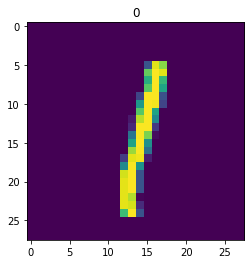

In [5]:
i=96
plt.imshow(X[i].reshape(28,28))
plt.title(y[i].argmax())

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from keras.models import *
from keras.layers import *
from keras.callbacks import ModelCheckpoint,EarlyStopping

In [8]:
model=Sequential()

model.add(Conv2D(128, (3, 3), input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(512, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))



model.add(Flatten())


model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))


model.add(Dense(10, activation='softmax'))

model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 128)       1280      
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 128)       512       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 128)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 512)       590336    
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 512)       2048      
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 512)       0

In [10]:
early_stopping_monitor = EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=0,
    mode='auto',
    restore_best_weights=True
)
# callback=ModelCheckpoint('best_model.h5',monitor='val_loss',save_best_only=True,verbose=1,mode='auto')

In [11]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping_monitor])

Epoch 1/100
840/840 [==============================] - 6s 7ms/step - loss: 0.1417 - accuracy: 0.9565 - val_loss: 0.0839 - val_accuracy: 0.9740
Epoch 2/100
840/840 [==============================] - 6s 7ms/step - loss: 0.0678 - accuracy: 0.9796 - val_loss: 0.0548 - val_accuracy: 0.9836
Epoch 3/100
840/840 [==============================] - 6s 7ms/step - loss: 0.0512 - accuracy: 0.9826 - val_loss: 0.0495 - val_accuracy: 0.9866
Epoch 4/100
840/840 [==============================] - 6s 7ms/step - loss: 0.0414 - accuracy: 0.9864 - val_loss: 0.0599 - val_accuracy: 0.9824
Epoch 5/100
840/840 [==============================] - 5s 6ms/step - loss: 0.0377 - accuracy: 0.9875 - val_loss: 0.0497 - val_accuracy: 0.9863
Epoch 6/100
840/840 [==============================] - 5s 6ms/step - loss: 0.0320 - accuracy: 0.9895 - val_loss: 0.0565 - val_accuracy: 0.9842
Epoch 7/100
840/840 [==============================] - 6s 7ms/step - loss: 0.0265 - accuracy: 0.9909 - val_loss: 0.0469 - val_accuracy: 0.9863

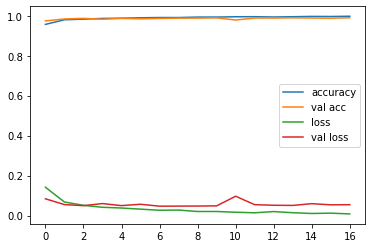

In [12]:
import matplotlib.pyplot as plt
res=history.history

plt.plot(res['accuracy'],label="accuracy")
plt.plot(res['val_accuracy'],label="val acc")
plt.plot(res['loss'],label='loss')
plt.plot(res['val_loss'],label='val loss')
plt.legend()
plt.show()

In [13]:
test=pd.read_csv('../input/digit-recognizer/test.csv').values/255.0
test=test.reshape(-1,28,28,1)

In [14]:
model.evaluate(X_test,y_test)

263/263 [==============================] - 1s 5ms/step - loss: 0.0349 - accuracy: 0.9890


[0.03493909165263176, 0.989047646522522]

In [15]:
pred=model.predict(test)

In [16]:
new_pred=[]
for i in pred:
    new_pred.append(i.argmax())

In [17]:
submit=pd.read_csv('../input/digit-recognizer/sample_submission.csv')
submit['Label']=new_pred

In [18]:
submit.to_csv('submissions1.csv',index=False)